In [ ]:
# uniquement pour utliser dans colab : 

# !git clone https://github.com/CarinePivoteau/Alea2023Notebooks.git
# import sys
# sys.path.append('/content/Alea2023Notebooks')

In [ ]:
# si les modules ne sont pas installés :

# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install graphviz

In [6]:
import sys
sys.path.append('../')

# imports : random, time, math, sys, plt, graphviz

from helpers import *
from gen_laws import *

In [7]:
def random_set_partition_free(x):
    def label(s):
        size = sum(s)
        rand_perm = random_permutation(size)
        return size, [[rand_perm.pop() for i in range(j)] for j in s]

    k = poiss(math.exp(x)-1)
    p = [non_zero_poiss(x) for i in range(k)]
    
    return label(p)

def size_of_random_set_partition_free(x):
    k = poiss(math.exp(x)-1)
    return sum([non_zero_poiss(x) for i in range(k)])

def number_of_distinct_part_sizes_of_random_set_partition_free(x):
    k = poiss(math.exp(x)-1)
    size = 0
    distcints = set()
    for _ in range(k):
        s = non_zero_poiss(x)
        size += s
        distcints.add(s)
    return size,len(distcints)

In [8]:
size, sp = random_set_partition_free(3)
print(size, sp)

76 [[48, 65, 55, 5, 44], [59, 67, 38, 74, 64], [54, 51], [57, 49, 39, 40], [16, 22, 34, 4], [47, 33], [66, 15, 42, 13], [23, 17, 52, 12, 24], [72, 73], [53], [30, 31], [14, 50], [11, 29, 9, 26, 58, 61], [35], [69], [70, 21], [63, 75, 76, 8], [27, 3, 7, 71], [6, 43, 28, 56], [60, 68], [10, 62, 18, 25], [45, 32, 46, 20], [37, 41], [36, 2, 19, 1]]


In [4]:
print(number_of_distinct_part_sizes_of_random_set_partition_free(6.5))

(4675, 15)


In [5]:
from collections import defaultdict
def counts_max_and_average2(gen,nb):
    counts = defaultdict(int)
    discard = 0
    for i in range(nb):
        size = gen()
        counts[size] += 1
    m = max(counts.keys())
    l = [0]*(m+1)
    for k,v in counts.items():
        l[k] = v
    return discard, l, m, sum([i*l[i] for i in range(len(l))])/nb

n = 100_000
values = [1.5,2,2.5,3,5]
k = len(values)
l = [0]*k
for i in range(k):
    d, l[i], m, a = counts_max_and_average2(lambda : size_of_random_set_partition_free(values[i]), n)
    print("trop grands = {}, taille max = {}, moyenne des tailles = {}".format(d,m,a))

trop grands = 0, taille max = 33, moyenne des tailles = 6.73849
trop grands = 0, taille max = 52, moyenne des tailles = 14.79344
trop grands = 0, taille max = 95, moyenne des tailles = 30.51668
trop grands = 0, taille max = 138, moyenne des tailles = 60.27452
trop grands = 0, taille max = 1040, moyenne des tailles = 742.13879


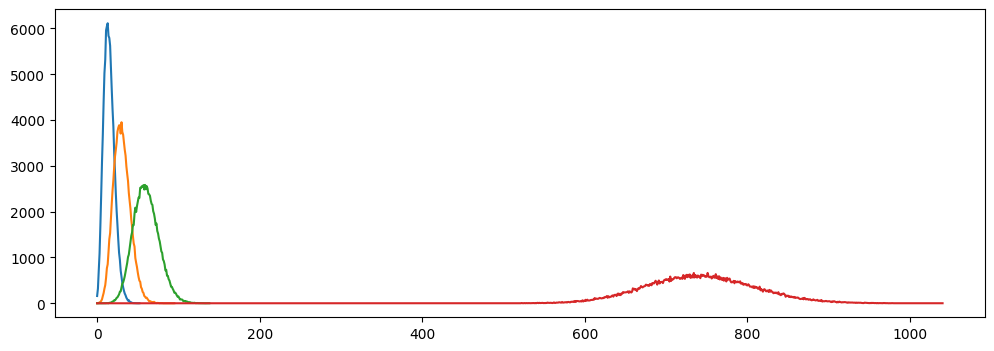

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

for i in range(1,k):
    plt.plot(l[i])
plt.show()

Tester empiriquement que le nombre de tailles de parts distinctes est en $O(\log n)$. 

Réf : "On the number of distinct block sizes in partitions of a set", Odlyzko, Richmond, JCTA 1985

In [7]:
from collections import defaultdict

nb = 10_000
counts = defaultdict(int)
distincts = defaultdict(int)
discard = 0
for val in [1,1.5,2,2.5,3,3.5,4,4.5,4.7,5]:
    for i in range(nb):
        size,d = number_of_distinct_part_sizes_of_random_set_partition_free(val)
        counts[size] += 1
        distincts[size] += d
m = max(counts.keys())
l = [0]*(m+1)
for k,v in counts.items():
    l[k] = distincts[k]/v

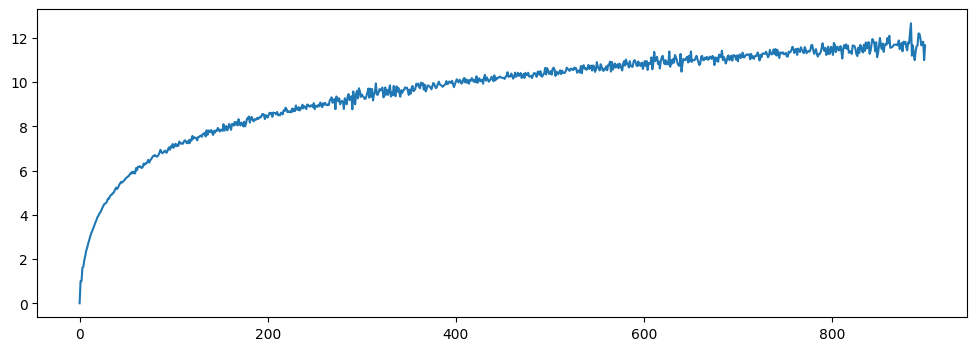

In [8]:
plt.rcParams['figure.figsize'] = [12, 4]

plt.plot(l[:900])
plt.show()

In [9]:
from collections import defaultdict

nb = 1_000_000
counts = defaultdict(int)
distincts = defaultdict(int)
discard = 0
val = .9
inc = (6.5-val)/nb
for i in range(nb):
    size,d = number_of_distinct_part_sizes_of_random_set_partition_free(val)
    counts[size] += 1
    distincts[size] += d
    val+=inc
m = max(counts.keys())
l = [0]*(m+1)
for k,v in counts.items():
    l[k] = distincts[k]/v

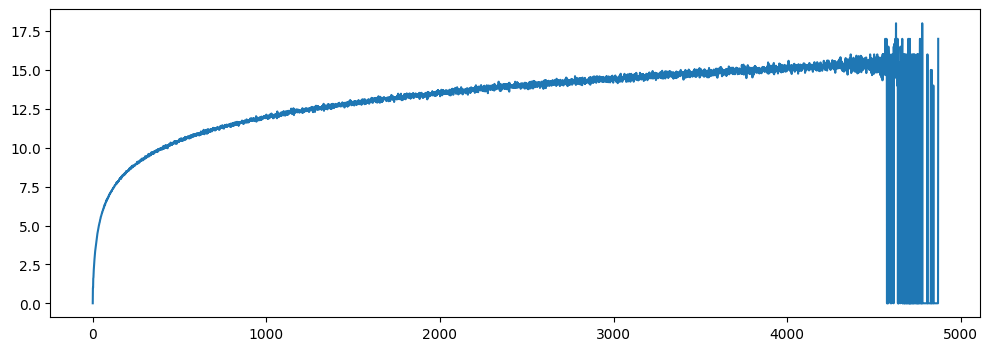

In [10]:
plt.rcParams['figure.figsize'] = [12, 4]

plt.plot(l)
plt.show()